<a href="https://colab.research.google.com/github/amrutha-krishna-117/credit-card-fraud-detection/blob/main/CFDEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
c.in# Install Sweetviz if needed
!pip install sweetviz

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sweetviz as sv
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 59.6 MB/s eta 0:00:00


In [ ]:
# Load your credit card dataset
df = pd.read_csv("/content/creditcard.csv")  # Adjust path if needed
df_clean = df.dropna()
# Basic overview
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118921 entries, 0 to 118920
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    118921 non-null  int64  
 1   V1      118921 non-null  float64
 2   V2      118921 non-null  float64
 3   V3      118921 non-null  float64
 4   V4      118921 non-null  float64
 5   V5      118921 non-null  float64
 6   V6      118921 non-null  float64
 7   V7      118921 non-null  float64
 8   V8      118921 non-null  float64
 9   V9      118921 non-null  float64
 10  V10     118921 non-null  float64
 11  V11     118921 non-null  float64
 12  V12     118921 non-null  float64
 13  V13     118921 non-null  float64
 14  V14     118921 non-null  float64
 15  V15     118921 non-null  float64
 16  V16     118920 non-null  float64
 17  V17     118920 non-null  float64
 18  V18     118920 non-null  float64
 19  V19     118920 non-null  float64
 20  V20     118920 non-null  float64
 21  V21     11

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()

# Check datatype consistency
print("Data Types:\n", df.dtypes)

# Check class balance
print("Class Distribution:\n", df['Class'].value_counts())

Number of duplicate rows: 469
Data Types:
 Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object
Class Distribution:
 Class
0.0    118211
1.0       240
Name: count, dtype: int64


In [ ]:
!pip install ydata-profiling --quiet

from ydata_profiling import ProfileReport

profile = ProfileReport(df_clean, title="Credit Card Fraud EDA Report", explorative=True)
profile.to_file("eda_report.html")  # Download from sidebar if in Colab

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 31/31 [00:07<00:00,  4.01it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

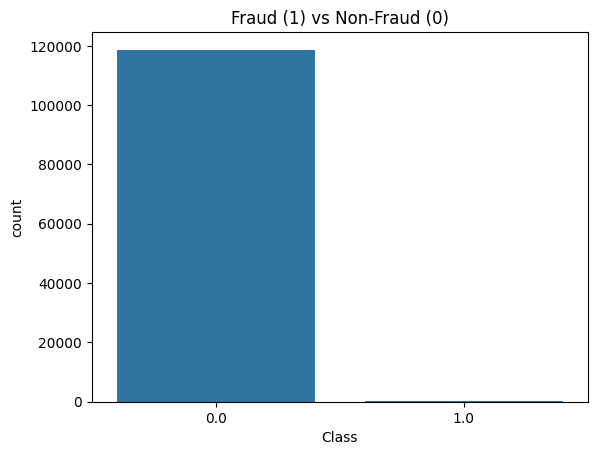

In [ ]:
sns.countplot(x='Class', data=df_clean)         #target variable
plt.title("Fraud (1) vs Non-Fraud (0)")
plt.show()

In [ ]:
fig = px.histogram(df_clean, x="Amount", color="Class", nbins=100, title="Transaction Amount Distribution")
fig.show()


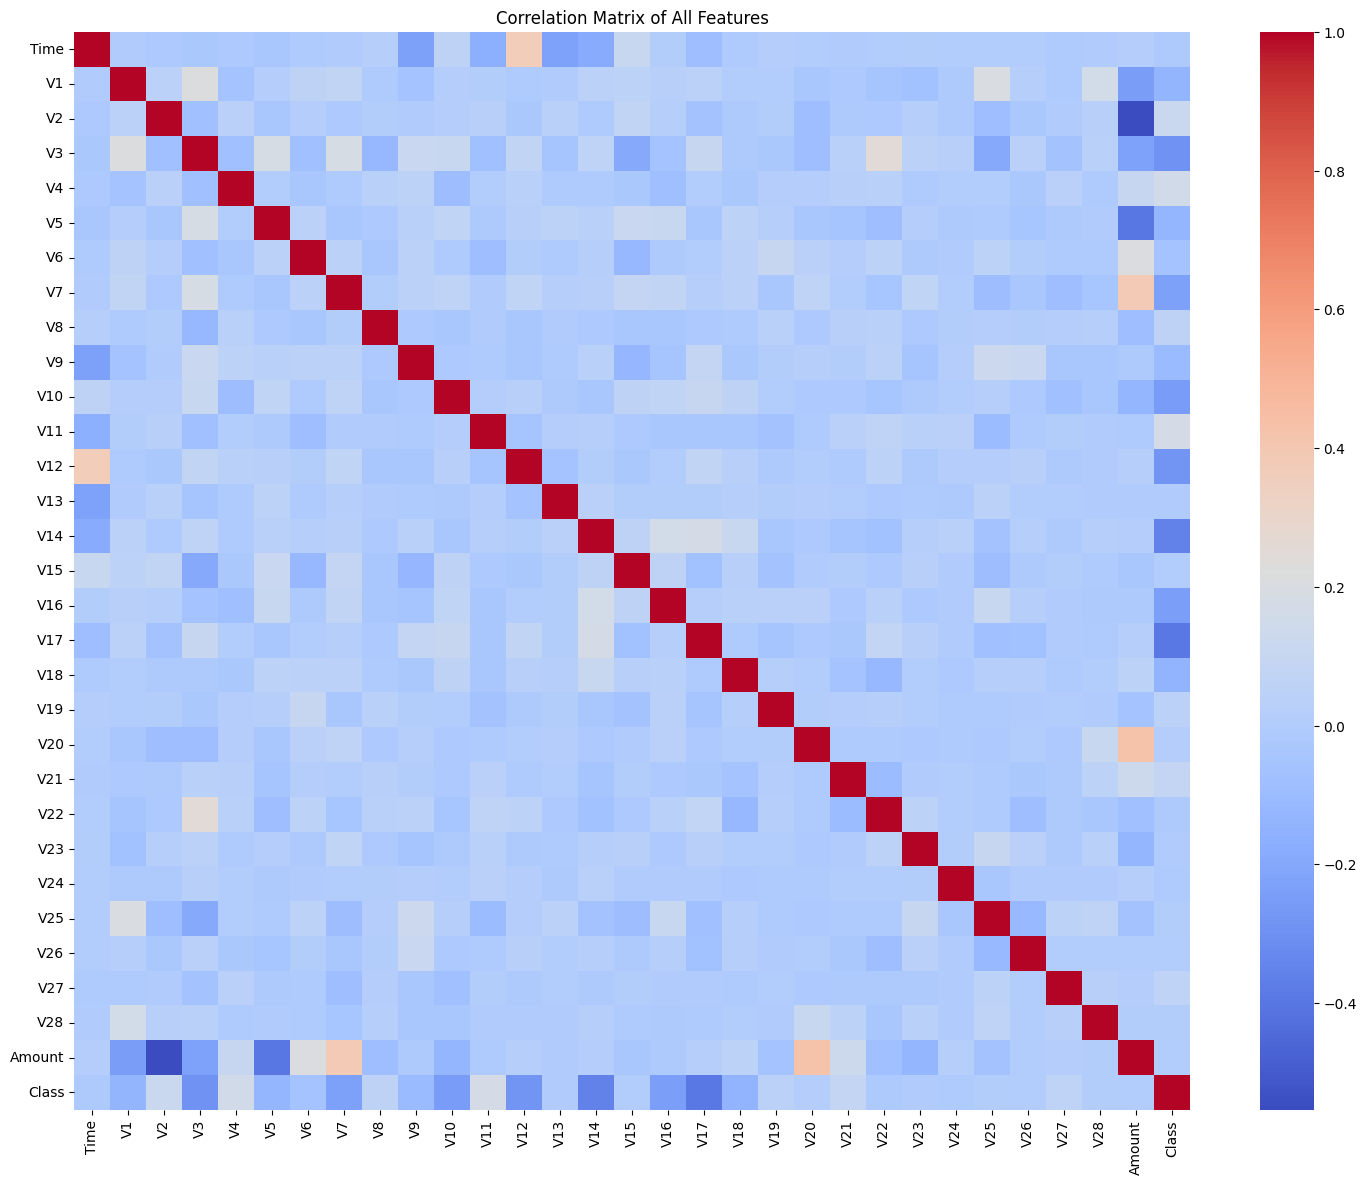

In [ ]:
corr = df_clean.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of All Features")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean.drop('Class', axis=1))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

df_clean['PCA1'] = pca_result[:, 0]
df_clean['PCA2'] = pca_result[:, 1]

fig = px.scatter(df_clean, x='PCA1', y='PCA2', color='Class', title='PCA Projection (2D)')
fig.show()

In [ ]:
# Check for missing values
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
# Check for duplicate records
df.duplicated().sum()


np.int64(0)

In [ ]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)


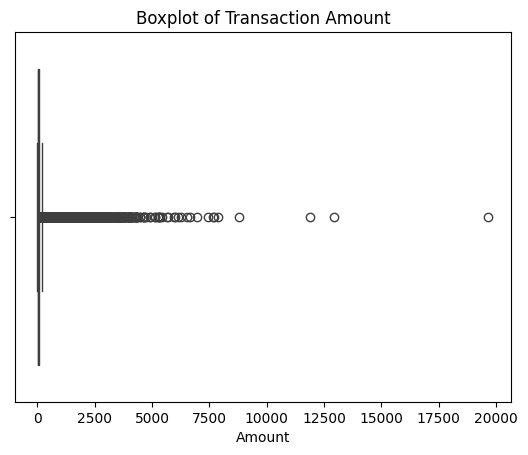

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Amount'])
plt.title("Boxplot of Transaction Amount")
plt.show()


In [ ]:
# Check datatypes
df.dtypes


Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler #Normalization

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])


In [ ]:
df.head()
df.describe()


Time             V1             V2             V3  \
count  1.184520e+05  118452.000000  118452.000000  118452.000000   
mean   1.151726e-16      -0.247488      -0.014678       0.680281   
std    1.000004e+00       1.826409       1.630206       1.290655   
min   -2.490404e+00     -56.407510     -72.715728     -33.680984   
25%   -6.046610e-01      -1.017402      -0.587275       0.175015   
50%    9.691231e-02      -0.260485       0.087014       0.753803   
75%    8.171264e-01       1.155971       0.750325       1.374602   
max    1.495187e+00       1.960497      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  118452.000000  118452.000000  118452.000000  118452.000000   
mean        0.152504      -0.281723       0.088798      -0.113473   
std         1.335430       1.331294       1.292919       1.185469   
min        -5.172595     -42.147898     -26.160506     -31.764946   
25%        -0.706711      -0.902822      -0.653493      -0.600998   
50%         0.180409      -0.315417      -0.164138      -0.066149   
75%         1.011546       0.243270       0.478496       0.412143   
max        16.715537      34.801666      22.529298      36.677268   

                  V8             V9  ...            V21            V22  \
count  118452.000000  118452.000000  ...  118451.000000  118451.000000   
mean        0.060771      -0.079288  ...      -0.036168      -0.112566   
std         1.197742       1.091676  ...       0.708092       0.635435   
min       -73.216718      -9.283925  ...     -34.830382     -10.933144   
25%        -0.133838      -0.707975  ...      -0.225223      -0.541115   
50%         0.077414      -0.140508  ...      -0.058517      -0.091236   
75%         0.368618       0.507340  ...       0.117385       0.306668   
max        20.007208      15.594995  ...      27.202839      10.503090   

                 V23            V24            V25            V26  \
count  118451.000000  118451.000000  118451.000000  118451.000000   
mean       -0.035532       0.011218       0.130993       0.027713   
std         0.610937       0.595035       0.439270       0.491330   
min       -44.807735      -2.836627     -10.295397      -2.534330   
25%        -0.174345      -0.324535      -0.134134      -0.322745   
50%        -0.047920       0.067443       0.168320      -0.063984   
75%         0.082171       0.408362       0.419496       0.293257   
max        19.002942       4.016342       5.541598       3.517346   

                 V27            V28        Amount          Class  
count  118451.000000  118451.000000  1.184510e+05  118451.000000  
mean        0.002724       0.002597 -8.877960e-18       0.002026  
std         0.386472       0.313584  1.000004e+00       0.044967  
min       -22.565679     -11.710896 -3.687134e-01       0.000000  
25%        -0.060438      -0.004502 -3.418241e-01       0.000000  
50%         0.010921       0.023456 -2.712884e-01       0.000000  
75%         0.084989       0.077145 -3.684471e-02       0.000000  
max        12.152401      33.847808  7.623283e+01       1.000000  

[8 rows x 31 columns]

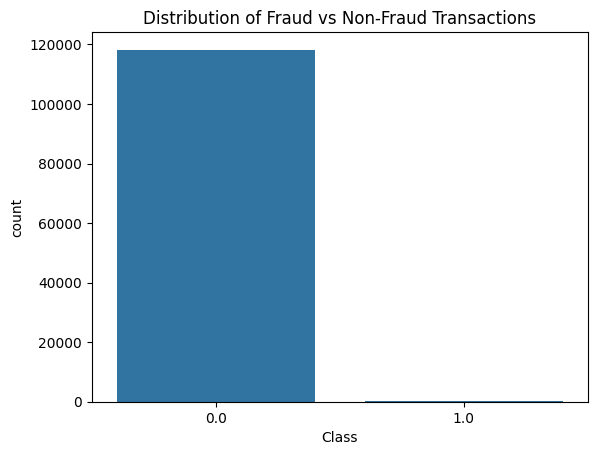

In [ ]:
sns.countplot(x='Class', data=df)
plt.title("Distribution of Fraud vs Non-Fraud Transactions")
plt.show()


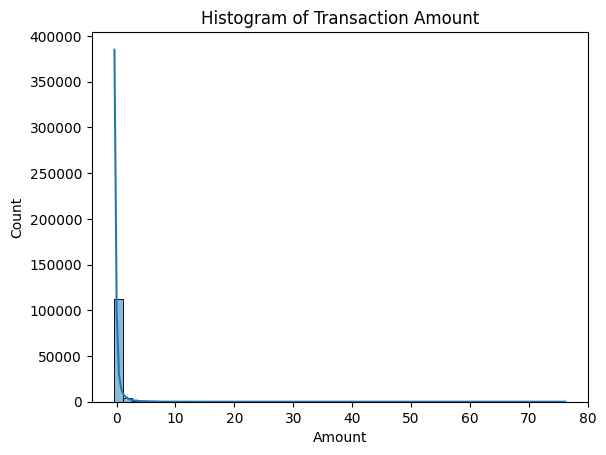

In [ ]:
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Histogram of Transaction Amount")
plt.show()


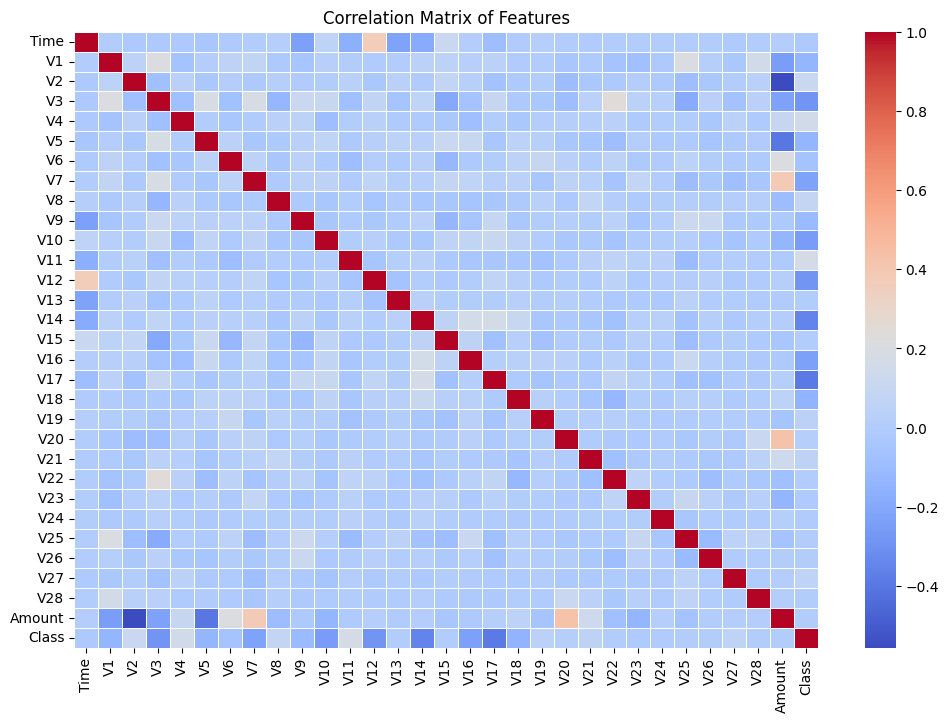

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


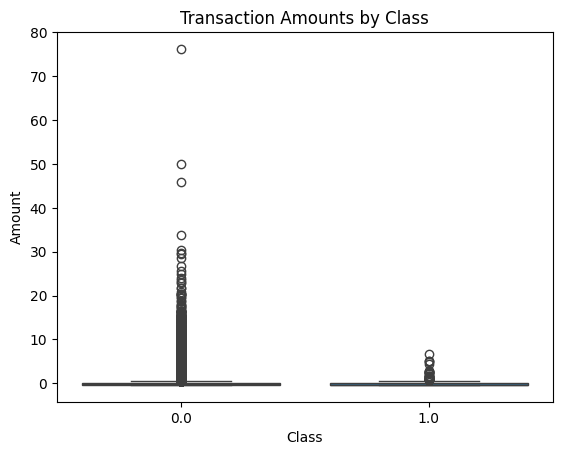

In [ ]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amounts by Class")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])


In [ ]:
df['Hour'] = (df['Time'] * 86400).astype(int) % 24


In [ ]:
df['AmountBin'] = pd.qcut(df['Amount'], q=4, labels=False)


In [ ]:
df['V1_V2_ratio'] = df['V1'] / (df['V2'] + 1e-5)


In [ ]:
# Remove rows where target 'Class' is NaN
df = df.dropna(subset=['Class'])

# Then proceed to split
X = df.drop('Class', axis=1)
y = df['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr, digits=4))


Logistic Regression Report:

              precision    recall  f1-score   support

         0.0     0.9992    0.9997    0.9995     35464
         1.0     0.7895    0.6250    0.6977        72

    accuracy                         0.9989     35536
   macro avg     0.8944    0.8123    0.8486     35536
weighted avg     0.9988    0.9989    0.9988     35536



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf, digits=4))


Random Forest Report:

              precision    recall  f1-score   support

         0.0     0.9997    0.9999    0.9998     35464
         1.0     0.9677    0.8333    0.8955        72

    accuracy                         0.9996     35536
   macro avg     0.9837    0.9166    0.9477     35536
weighted avg     0.9996    0.9996    0.9996     35536



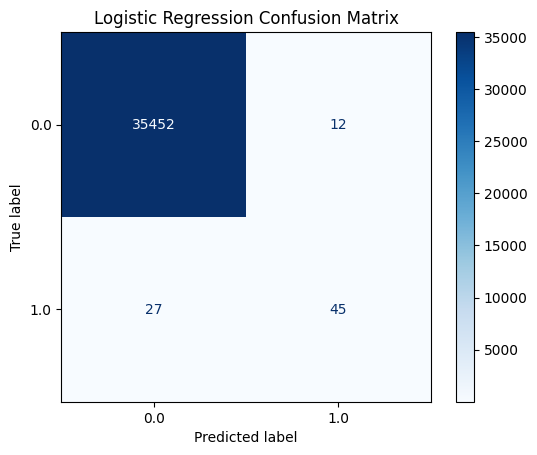

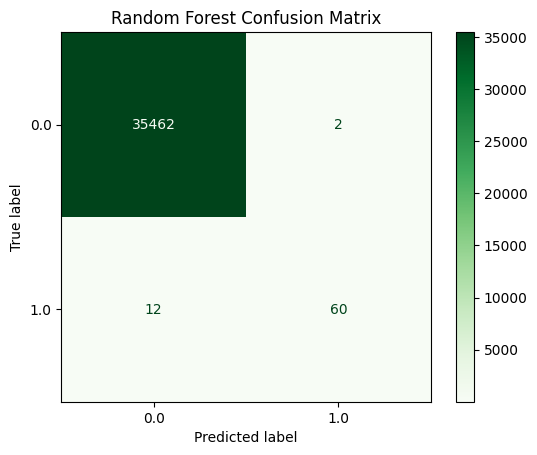

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()


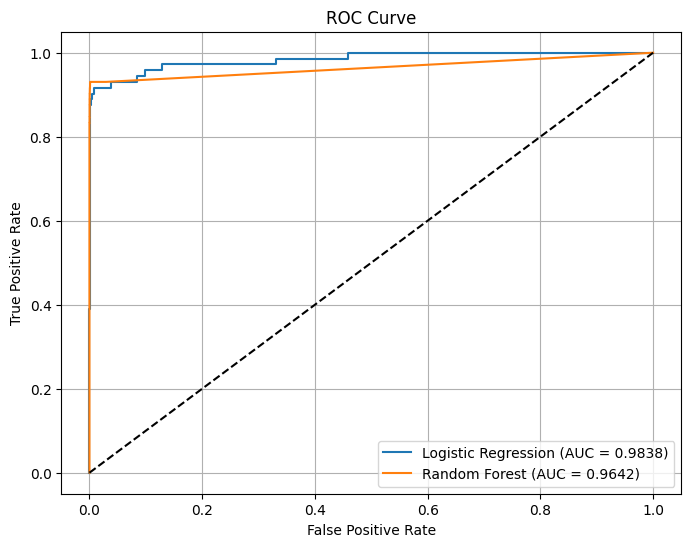

In [ ]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression
lr_probs = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


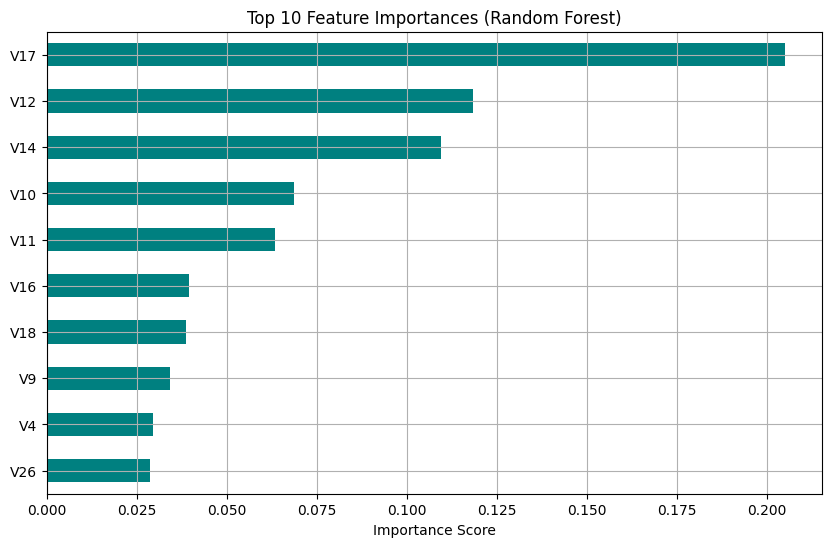

In [ ]:
import pandas as pd

importances = rf.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
forest_importances.head(10).plot(kind='barh', color='teal')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


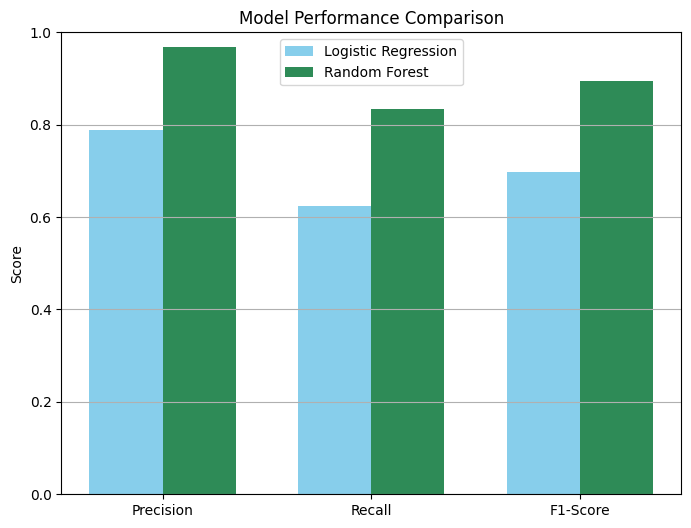

In [ ]:
import numpy as np

metrics = ['Precision', 'Recall', 'F1-Score']
lr_scores = [precision_score(y_test, y_pred_lr), recall_score(y_test, y_pred_lr), f1_score(y_test, y_pred_lr)]
rf_scores = [precision_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf)]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, lr_scores, width, label='Logistic Regression', color='skyblue')
plt.bar(x + width/2, rf_scores, width, label='Random Forest', color='seagreen')

plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.show()
